In [2]:
from  tabulate import tabulate

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy.stats import f
import math
import pandas as pd

In [3]:
emp=pd.read_csv('C:\\Users\\Koustav\\Downloads\\employee.csv')

In [4]:
emp

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [6]:
df=emp

In [7]:
print(df.shape) #returns a tuple of number of rows and columns 

(1470, 27)


In [8]:
print(df.columns) # returns array of columns in dataset 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [9]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [10]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [11]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 43:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  --------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField
EnvironmentSatisfaction
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [12]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

In [13]:
info_of_cat("Attrition") #function returns all the information required for the level 1 analysis

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


# Attrition is  nominal data type

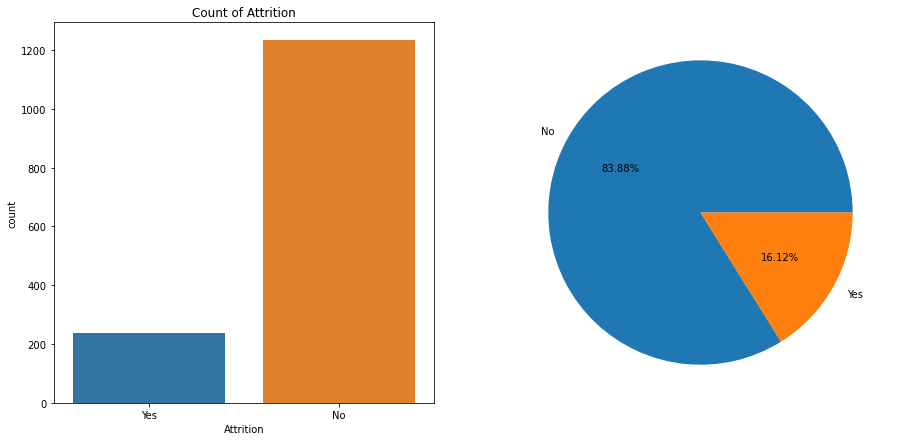

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition")                  # Set the title of the graph
percentage = df["Attrition"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Attrition"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Interpretation: The results show that only 16% of the employees have left the firm while 83.9% are still working with the firm
    

In [16]:
bt_mode = df["BusinessTravel"].mode()[0]
print(bt_mode)
df["BusinessTravel"].fillna(bt_mode, inplace = True, axis = 0)

Travel_Rarely


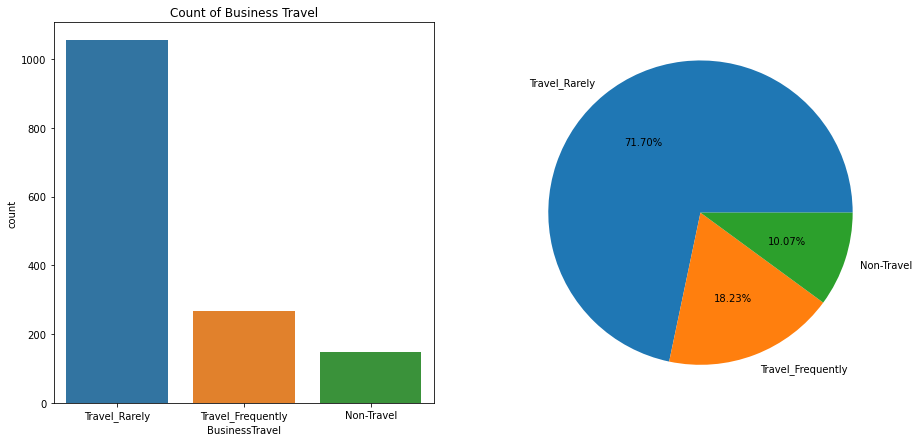

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Business Travel")              # Set the title of the graph
percentage = df["BusinessTravel"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["BusinessTravel"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["BusinessTravel"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 
plt.show()

# Interpretation: Majority of the employees are travelling rarely for business purposes.

In [19]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4

There are null values in the Department column


In [20]:
department_mode = df.Department.mode()[0]
print(department_mode)
df["Department"].fillna(department_mode, inplace = True)

Research & Development


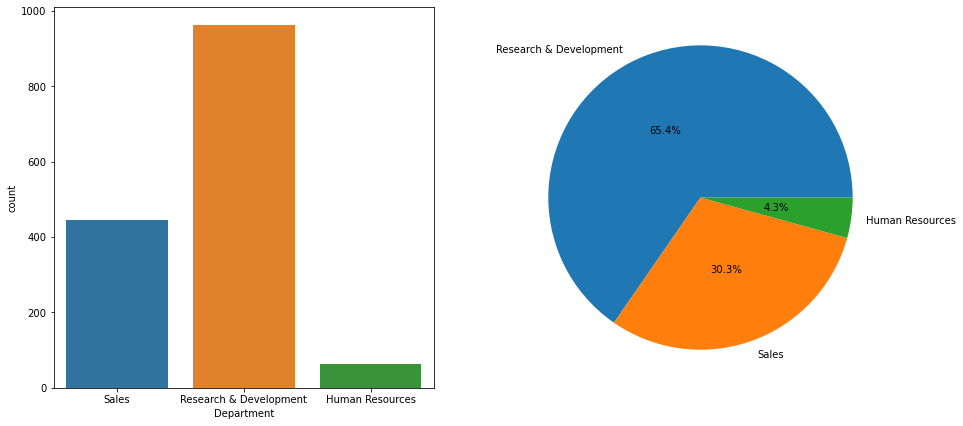

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["Department"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sb.countplot(x = df["Department"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()


# Interpretation: 65% of the employees are working in Research and Development department where 30% are from Sales and only 4% are from HR.

In [23]:
info_of_cat("DistanceFromHome") # check for the unique values in the feature

Unique values in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Mode of DistanceFromHome is 2
Number of missing values in DistanceFromHome is 0


In [24]:
info_of_cat("EducationField") # check for the unique values in the feature

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12

There are null values in the EducationField column


In [25]:
ed_mode = df.EducationField.mode()[0]
print(ed_mode)
df["EducationField"].fillna(ed_mode, inplace = True)

Life Sciences


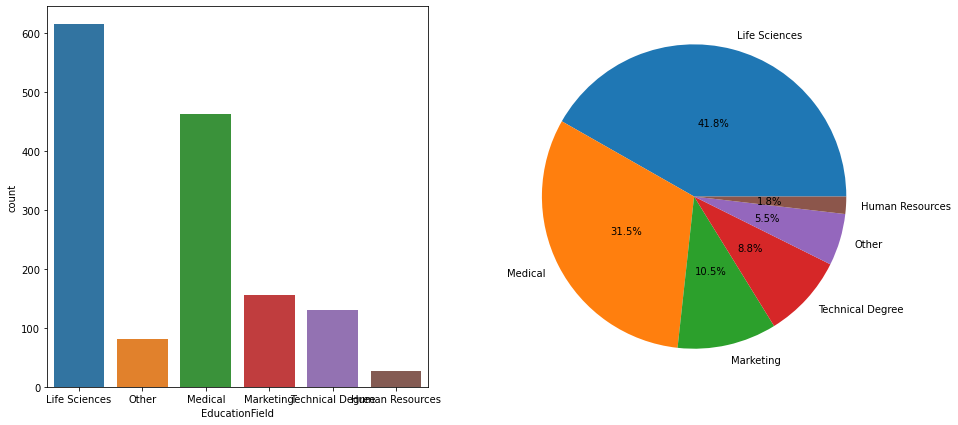

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["EducationField"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sb.countplot(x = df["EducationField"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()


# Interpretation: 73% of the employees are from Medical or Life Science backgrounds.¶

In [28]:
info_of_cat("EnvironmentSatisfaction") # check for the unique values in the feature

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


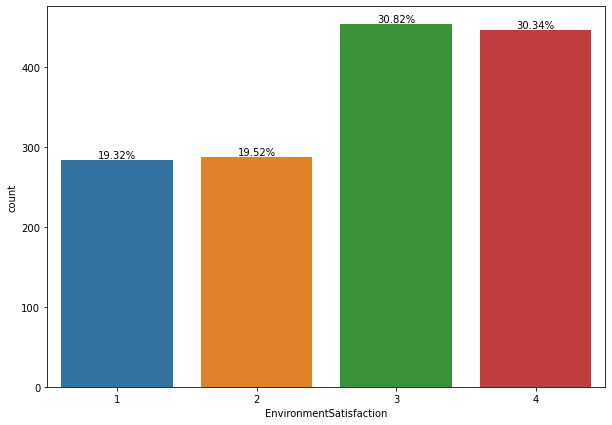

In [31]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sb.countplot(x = df["EnvironmentSatisfaction"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Interpretation: 38% of the employees have lower Environment Satisfaction.¶
---> 1 and 2 are assigned with the lower environment satisfaction category.

In [32]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45

There are null values in the Gender column


In [34]:
df["Gender"].fillna("Not Known", inplace = True)

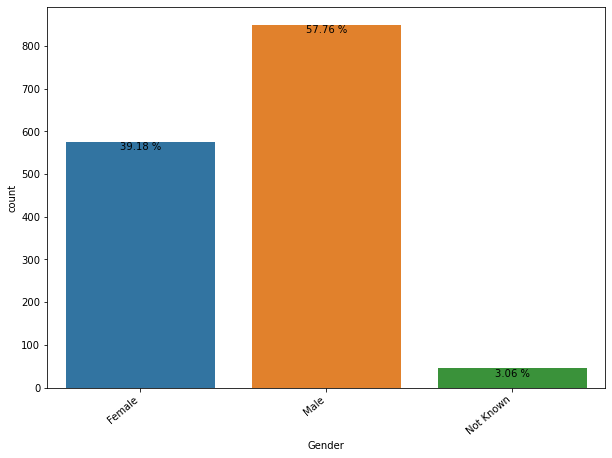

In [36]:
# Plot the graph-
fig, ax = plt.subplots(figsize= (10, 7))
ax = sb.countplot(x = df["Gender"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(df["Gender"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round((bar.get_height()/count)*100, 2)} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()

# Interpretation: 57% of the employees are males and 39% are females.

In [37]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56

There are null values in the MaritalStatus column


In [38]:
df["MaritalStatus"].fillna("Not known", inplace = True)

Married      44.217687
Single       30.544218
Divorced     21.428571
Not known     3.809524
Name: MaritalStatus, dtype: float64


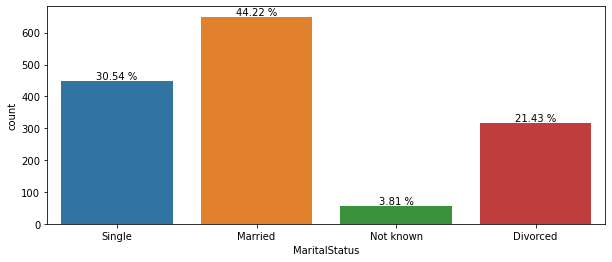

In [39]:
print((df["MaritalStatus"].value_counts()/len(df))*100)               #First calculated the number of marital status via value counts inbuilt function and then 
                                                                            #calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 4))
sb.countplot(x = df[ 'MaritalStatus'], ax = ax)
for bar in ax.patches:                                                  # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  # first it calculate the bar height and then dividing by the number of rows in data and 
                                                                            #multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       # annotate: used to annotate over objects. here objects are the bars.
plt.show()

# Interpretation: 44% of the employees are married and 30% of them have Single relationship status

In [41]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54

There are null values in the Over18 column


In [42]:
mode = df["Over18"].mode()[0]
df["Over18"].fillna(mode, inplace = True, axis = 0)

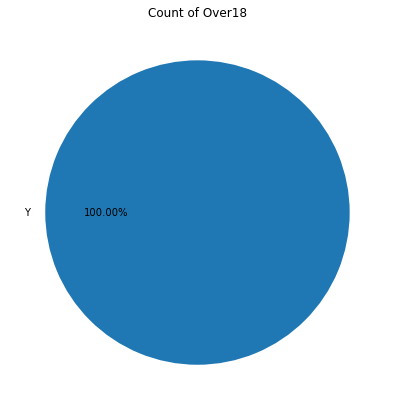

In [43]:
fig, ax = plt.subplots( figsize = (15, 7))
ax.set_title("Count of Over18")                  # Set the title of the graph
percentage = df["Over18"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Over18"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Interpretation: The whole population is above 18 years. There is no child labor involved.

In [44]:
info_of_cat("PerformanceRating")

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


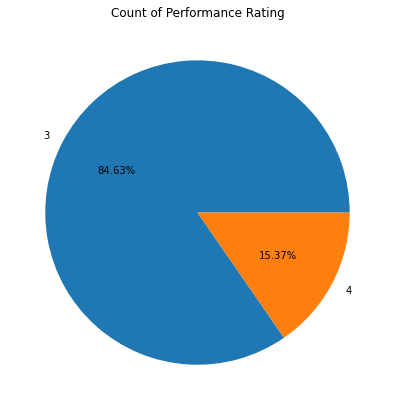

In [45]:
fig, ax = plt.subplots( figsize = (15, 7))
ax.set_title("Count of Performance Rating")                  # Set the title of the graph
percentage = df["PerformanceRating"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["PerformanceRating"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [46]:
info_of_cat("TotalWorkingYears")

Unique values in TotalWorkingYears are: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Mode of TotalWorkingYears is 10
Number of missing values in TotalWorkingYears is 0


In [47]:
categorical.remove("TotalWorkingYears")
continuous.append("TotalWorkingYears")

In [48]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


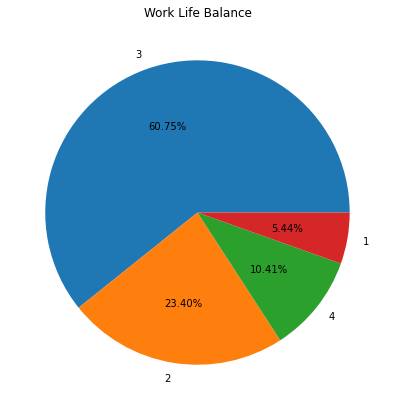

In [49]:
fig, ax = plt.subplots( figsize = (15, 7))
ax.set_title("Work Life Balance")                  # Set the title of the graph
percentage = df["WorkLifeBalance"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["WorkLifeBalance"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

Interpretation: Almost 70% of the employees seem to have a good work life balance.¶


# LEVEL 1 Analysis of Numerical Columns

13 User defined function for calculating mean, median, standard deviation, and count of all the null values¶

In [51]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [52]:
continuous

['Age', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'TotalWorkingYears']

In [53]:
info_of_numerical("Age")

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24


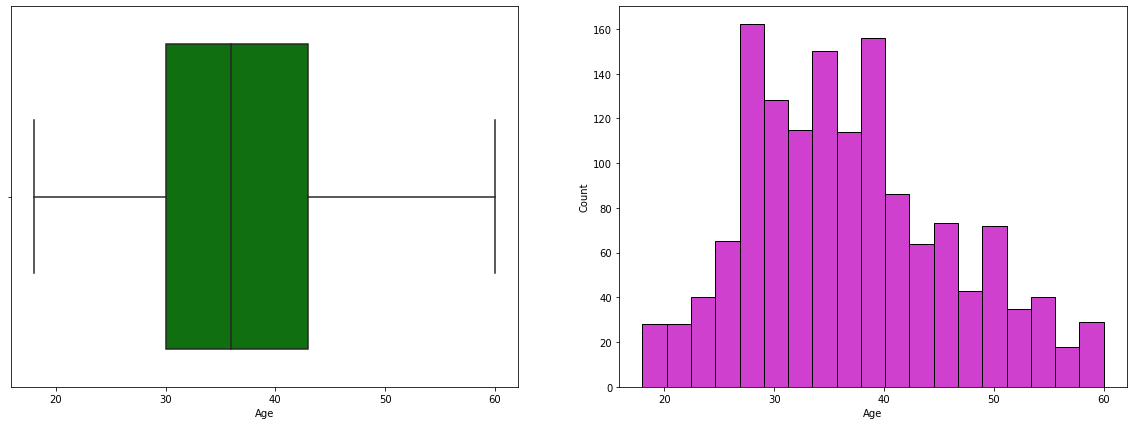

In [56]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

Employee's Age is a continuous datatype (Numerical)

This data is normally distributed

In [58]:
mean = 36
df["Age"].fillna(mean, axis = 0, inplace = True)

In [59]:
info_of_numerical("Age")

The mean of the Age is 36.914965986394556
The median of the Age is 36.0
The mode of the Age is 36.0
The standard deviation of the Age is 9.087816436803726
Number of missing values in the Age is 0


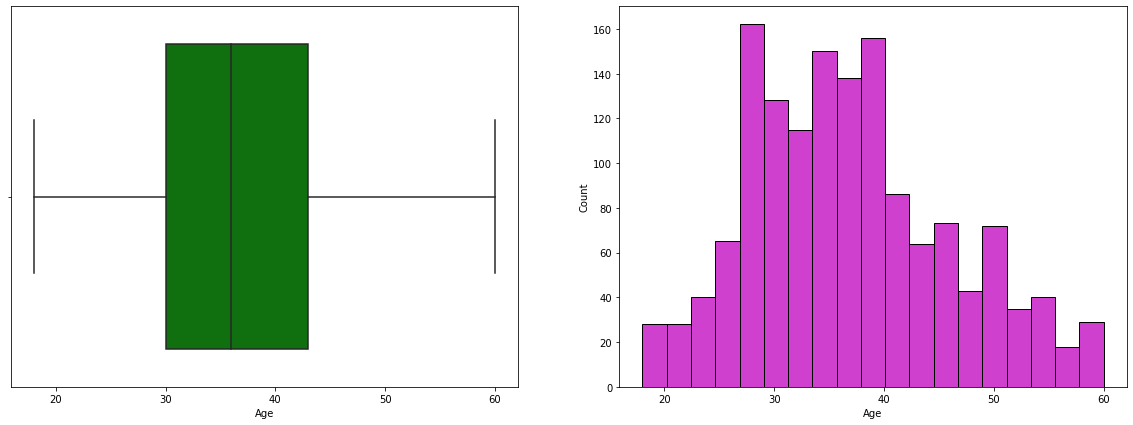

In [62]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

# Interpretation: Usually employee's age follows the normal distribution. There are no employees above the age of 60.

In [61]:
info_of_numerical("EmployeeNumber")

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.024334847475
Number of missing values in the EmployeeNumber is 0


# Interpretation: One is not supposed to perform measures of central tendency on the employee code column of the company.

# 16. Analysis of HourlyRate:
LEVEL 1 Analysis of Numerical Data (Univariate Analysis)

In [63]:
info_of_numerical("HourlyRate")

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0


Hourly Rate is a continuous datatype (Numerical).

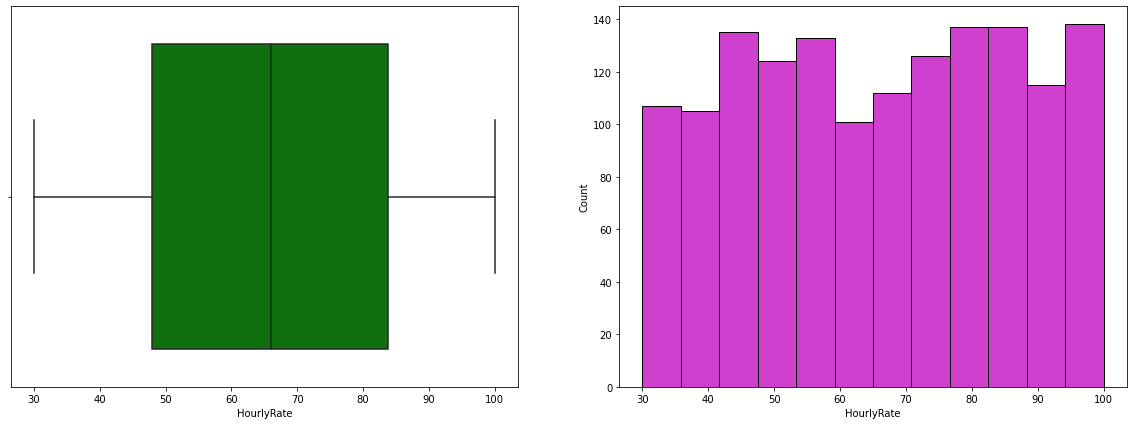

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sb.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

# Interpretation: Majority of employees have an hourly rate between $47 and $83.

17. Analysis of the MonthlyIncome

In [66]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0


# Monthly Income is a continuous datatype (Numerical).

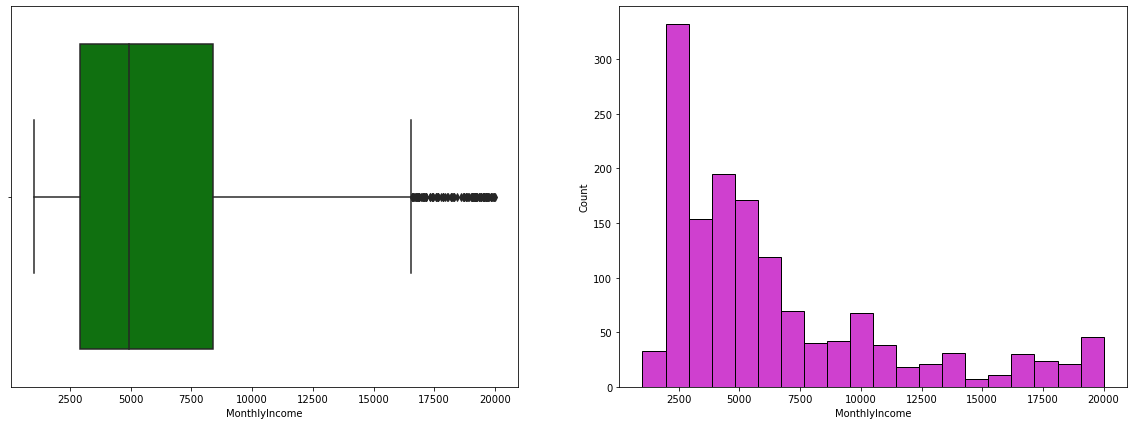

In [68]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sb.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

# This is a right skewed data.

#Outliers Analysis and Interpretation:
Majority of the employees are earning below $8K per month. There are a few employees who seem to earn more than $15K per month

# Level 2 Analysis 

In [69]:
x = print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


# CAT-CAT ANALYSIS (relationship between categorical data)

# 1. Analysis of Business Travel on Attrition¶
Level 2 Categorical to Categorical

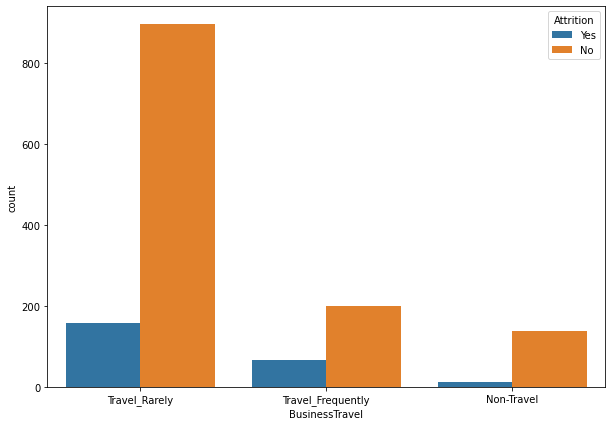

In [70]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "BusinessTravel", hue = "Attrition", data = df)
plt.show()

# Interpretation: Rarely traveling employees are the ones who seem to quit the company.

Further Analysis (Level 3)

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

One could consider analyzing all the above columns for the employees who are travelling rarely. However, it could be a waste of time; hence, it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

JobRole
Department
JobInvolvement

# 2. Analysis of EducationField analysis with the Attrition¶
Level 2 Categorical to Categorical

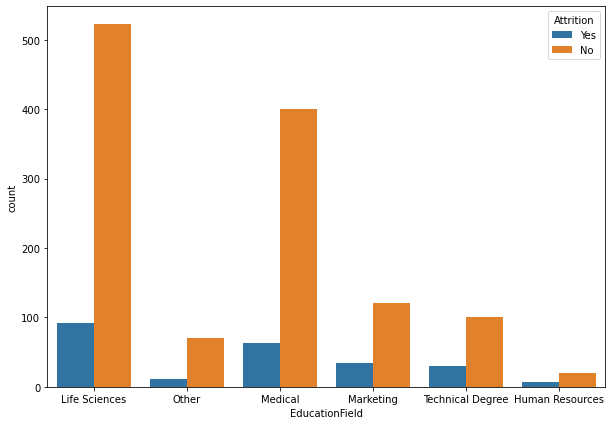

In [74]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "EducationField", hue = "Attrition", data = df)
plt.show()

Interpretation: The employees from Life Science and Medical fields seem to have higher attrition when compared to other educational majors. However, we noted that almost 70% of the employees in the company have a Life Science or Medical degree as education.

# One could consider analyzing all the above columns for the employees who are from Medical and Life Science backgrounds. However, it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Monthly Income
Years in current role
Years at company

# 3. Is there any relation between the Employee's Attrition and the Department?

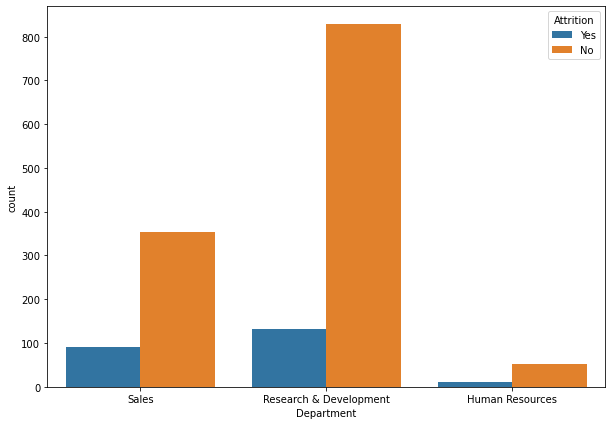

In [75]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Department", hue = "Attrition", data = df)
plt.show()

# Interpretation: The HR department seems to have the lowest attrition in terms of numbers.

In [76]:
df["Department"].groupby(df["Attrition"]).value_counts() 

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

In [77]:
print(f"R and D Attrition: {round(133/(133+828),2)}%")
print(f"Sales Attrition Rate: {round(92/(92+354),2)}%")
print(f"Human Resource: {round(12/(12+51),2)}%")

R and D Attrition: 0.14%
Sales Attrition Rate: 0.21%
Human Resource: 0.19%


# Interpretation: Although the HR team's attrition seems to be on the lower side, the above figures do not verify the same.

# Further Analysis (Level 3):¶
Let's look into the data to check if there is an additional information about the employees who are from the sales department.

# One could consider analyzing all the above columns for the employees who are from the sales department. However, it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.¶
Let's consider the following columns:

Attrition
Gender
Hourly Rate

# 4. Analysis of Environment Satisfaction with the Attrition¶
Level 2 Categorical to Categorical

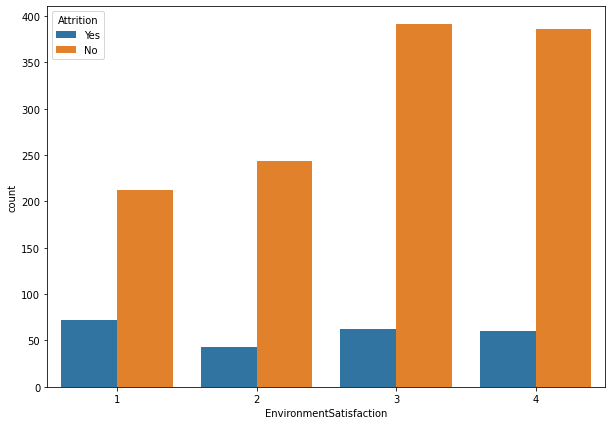

In [78]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "EnvironmentSatisfaction", hue = "Attrition", data = df)
plt.show()

# Interpretation: No clear patterns are visible in the employees who are attired with lower and higher environment satisfaction.

# One could consider analyzing all the above columns for the employees who have lower environment satisfaction. However, it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

JobRole
Department
HourlyRate

# Gender analysis on Attrition who left the firm and who are still with it

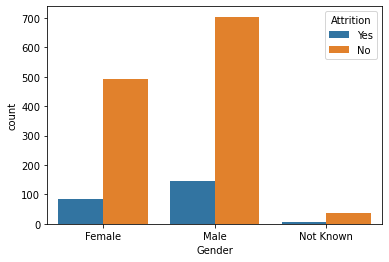

In [81]:
# fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Gender", hue = "Attrition", data = df)
plt.show()

# Interpretation: Number of males who attired is more as compared to the females.¶
But when the percentage is compared in the ratio of attiring with respect to their gender, the picture might be differen

In [82]:
df["Gender"].groupby(df["Attrition"]).value_counts()

Attrition  Gender   
No         Male         704
           Female       491
           Not Known     38
Yes        Male         145
           Female        85
           Not Known      7
Name: Gender, dtype: int64

In [83]:
print(f"Male Attrition Rate: {round(152/(152+742),2)}%")
print(f"Female Attrition Rate: {round(85/(85+491),2)}%")

Male Attrition Rate: 0.17%
Female Attrition Rate: 0.15%


# Interpretation: Males are having a higher number of Attrition but it is only a 2% of difference when compared to females.

# One could consider analyzing all the above columns for the employees who are males and their attrition rate. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Age
Department
HourlyRate

# 6. Marital Status analysis of the employees who have left the firm and who are still with it

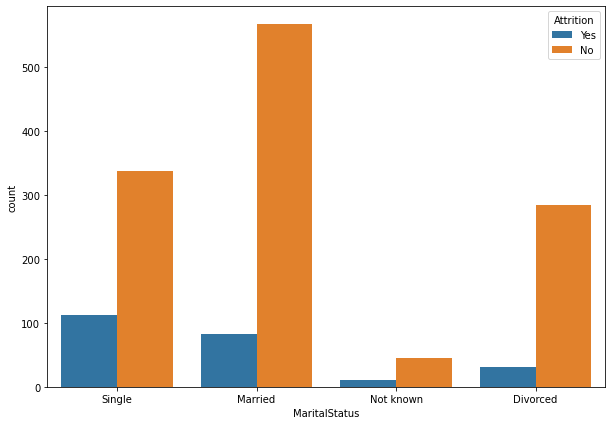

In [85]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "MaritalStatus", hue = "Attrition", data = df)
plt.show()

# Interpretation: Employees who are single have a higher rate of attrition as compared to those who are married.


# One could consider analyzing all the above columns for the employees who are single. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.¶
Let's consider the following columns:

Age
Monthly Income
Job Satisfaction

# 7. Effect of the Performance Rating with the Attrition

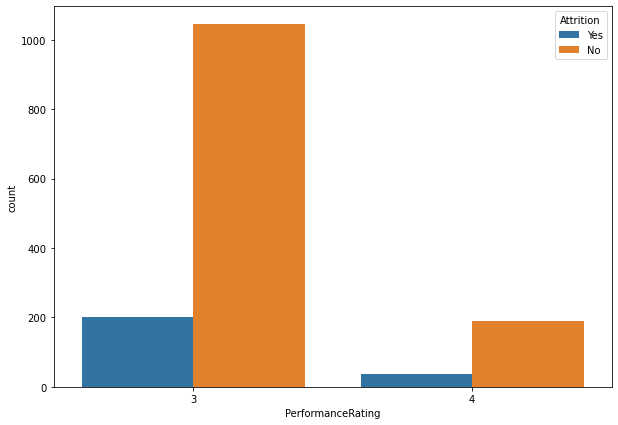

In [86]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "PerformanceRating", hue = "Attrition", data = df)
plt.show()

# Interpretation: Employees who have higher performance ratings tend to continue with the company.

# One could consider analyzing all the above columns for the employees who are having lower performance ratings. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Age
Years with current manager
Job Role

# 8. Job Satisfaction analysis of the employees who have left and those who are still with the firm.¶
Level 2 Categorical to Categorical

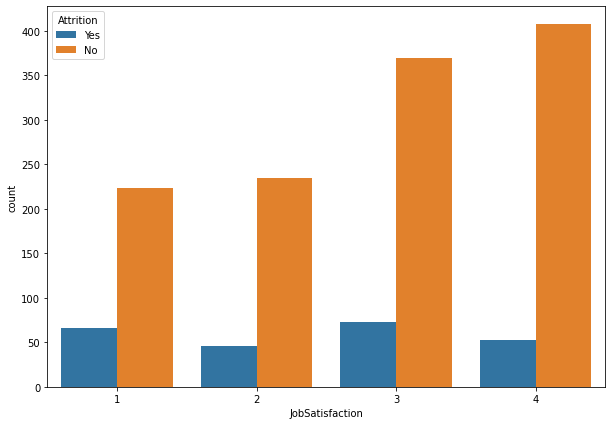

In [87]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "JobSatisfaction", hue = "Attrition", data = df)
plt.show()

# Interpretation: No clear pattern is visible in the people who are attired with lower and higher job satisfaction.


# One could consider analyzing all the above columns for the employees who have lower job satisfaction. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.¶
Let's consider the following columns:

Job Role
Department
HourlyRate

# CAT-NUM ANALYSIS (relationship between categorical and numerical data)

# 1. Employee's Age analysis with their customers who have left and with those who are still with the firm

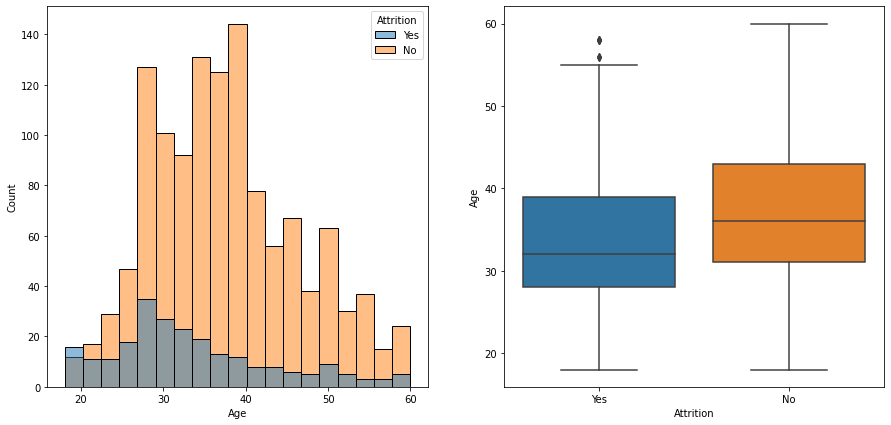

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = df["Age"], hue = df["Attrition"], ax = ax[0])
sb.boxplot(y = df["Age"], x = df["Attrition"], ax = ax[1])
plt.show()

# Interpretation: People who are attired are usually in the age range of 28 to 40 years whereas the people who are still working have a higher range of age from 33 to 43 years approx.

# One could consider analyzing all the above columns for the employees who are in the age range of 28 to 40 years. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.¶
Let's consider the following columns:

Job Role
Monthly Income
Year at company

# 2. Is there any relation between the hourly rate of the employees and the employees who have left?

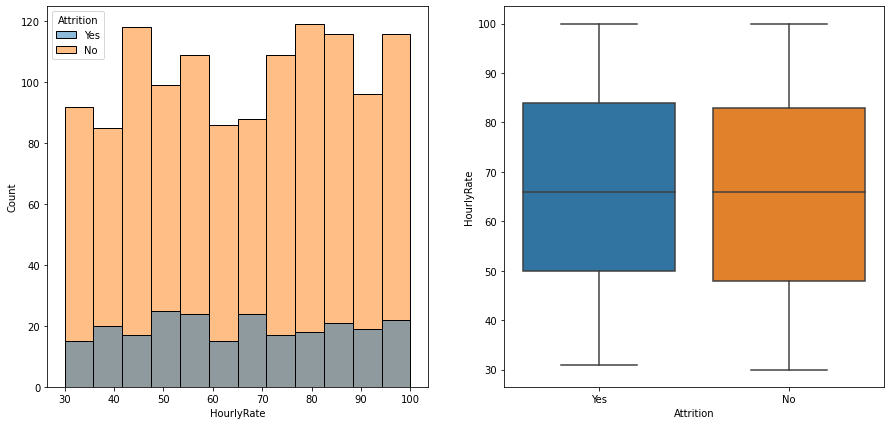

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = df["HourlyRate"], hue = df["Attrition"], ax = ax[0])
sb.boxplot(x = df["Attrition"] ,y = df["HourlyRate"] , ax = ax[1])
plt.show()

# Interpretation: Both of the employees' categories who are attired and who are still working with the firm have a common hourly rate.

# One could consider analyzing all the above columns for the employees' hourly rate who are still working for the firm. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.¶
Let's consider the following columns:

Age
Job Role
Total Working Years

# 3. Monthly Income analysis of the employees who have left and who are still with the firm

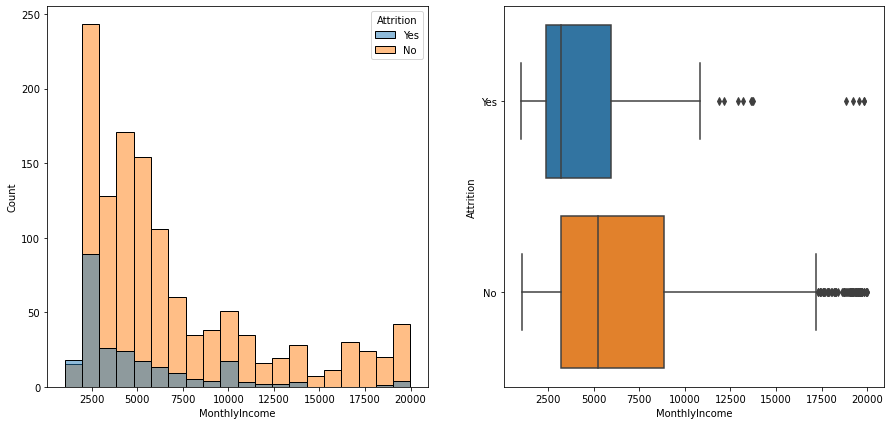

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = df["MonthlyIncome"], hue = df["Attrition"], ax = ax[0])
sb.boxplot(y = df["Attrition"], x = df["MonthlyIncome"], ax = ax[1])
plt.show()

# Interpretation: 75% of the employees who quit have an income slightly greater than the 50% of the employees who are still working with the firm.


# Further Analysis (Level 3):
Let's look into the data to check if there is an additional information about the employees who have left out the earning less than $6,000.

One could consider analyzing all the above columns for the employees who are earning less than 6000$. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Job Role
Age
Total working years

# 4. How distance from home is impacting the attrition of employees?

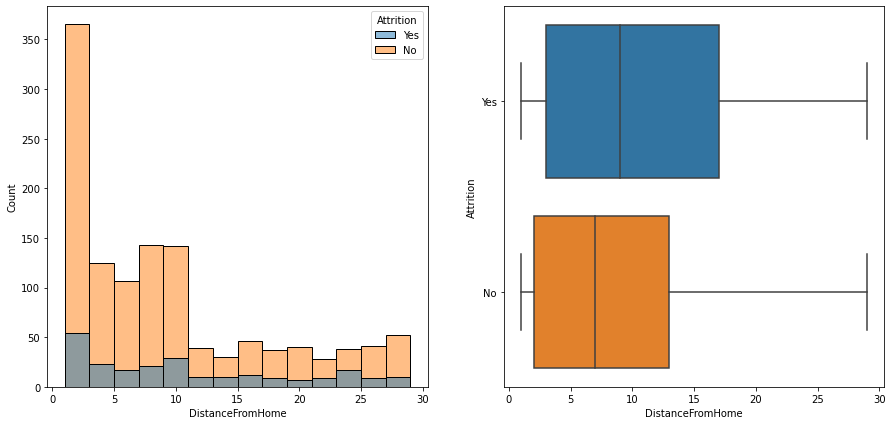

In [91]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = df["DistanceFromHome"], hue = df["Attrition"], ax = ax[0])
sb.boxplot(y = df["Attrition"], x = df["DistanceFromHome"], ax = ax[1])
plt.show()

# Interpretation: Employees who seem to travel long distances to reach the office seem to have a higher attrition rate.

# One could consider analyzing all the above columns for the employees who are having a distance larger than 7km. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Job role
Monthly Income
Job Involvement

5. Is there any relation between the total working years of the employees with attrition?

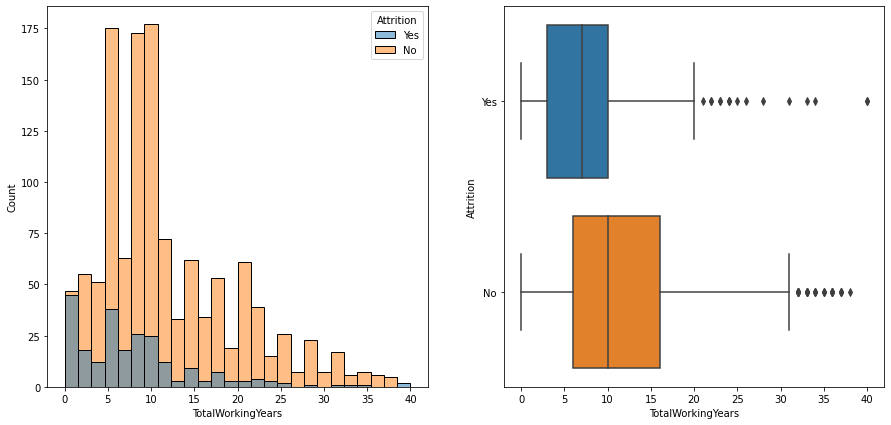

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = df["TotalWorkingYears"], hue = df["Attrition"], ax = ax[0])
sb.boxplot(y = df["Attrition"], x = df["TotalWorkingYears"], ax = ax[1])
plt.show()

# Interpretation: Employees with lower work experience seem to quit the job more often.¶
Further Analysis (Level 3):
Let's look into the data to check if there is an additional information about the employees who are having higher working experience.

df.columns

# One could consider analyzing all the above columns for the employees who are having higher working experience. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

Job Role
Monthly Income
Age